In [ ]:
try:
  import google.colab
  IN_COLAB = True
  print("Running as a Colab notebook")

  %pip install fancy_einsum
  %pip install einops
  # %pip install utils # This is simply a wrong utils to import. I'll uninstall it from the environ later to avoid confusion.
except:
  IN_COLAB = False
  print("Running as a Jupyter notebook - intended for development only!")

Running as a Colab notebook
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 827.8 kB/s eta 0:00:00


In [ ]:
import numpy as np
import torch
import einops
from fancy_einsum import einsum


# High-level thoughts
Can Einops do anything that Einsum can not?
- A priori: It seems to me taht Einsum can do most of them, except some repeat operations etc
- Einsum in essence is an oneliner that replaces all operations about changing dims, doing summations.



In [ ]:
# Einops opeartion  https://medium.com/ml-summaries/einops-making-tensor-ops-easy-in-deep-learning-236d2a1dc631

# Rearrange --> I guess this part is the same as einsum?
from einops import rearrange
x = np.random.randn(100,32,24)

# To less dims
A = rearrange(x, "a b c -> (a b) c")
print('A:',A.shape)

# To more dims
B = rearrange(x,"(a1 a2) b c ->a1 a2 b c", a1=25)
print("B:", B.shape)

# Reduce (always, if not all, is to cal the mean)
from einops import reduce
C = reduce(x, "a b c -> a b", "mean")
# C = einsum("a b c -> a b ()", x, "mean")  This does not hold in einsum. mean is done with einops
print("C:", C.shape)

# Repeat --> A way to expand a dim. The tricky part is tho, how do you actually fill in those new dims. Diff from rearrage that you break down some dims into more; "repeat" method simply
from einops import repeat
D = repeat(x, "a b c -> h a b c", h=5)
print("D:",D.shape)

A: (3200, 24)
B: (25, 4, 32, 24)
C: (100, 32)
D: (5, 100, 32, 24)


In [ ]:
# Playing some rearranging images game w/ Einops https://github.com/arogozhnikov/einops/blob/master/docs/1-einops-basics.ipynb

# Download images from Github
!wget https://github.com/arogozhnikov/einops/raw/master/docs/resources/test_images.npy


--2023-08-04 08:35:35--  https://github.com/arogozhnikov/einops/raw/master/docs/resources/test_images.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/arogozhnikov/einops/master/docs/resources/test_images.npy [following]
--2023-08-04 08:35:35--  https://raw.githubusercontent.com/arogozhnikov/einops/master/docs/resources/test_images.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1327232 (1.3M) [application/octet-stream]
Saving to: ‘test_images.npy’

test_images.npy     100%[===================>]   1.27M  --.-KB/s    in 0.03s   

2023-08-04 08:35:35 (41.0 MB/s) - ‘test_images.npy’ save

In [ ]:
# Access data via NumPy
ims = np.load('test_images.npy') # np.load produces a variable by loading the data
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


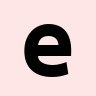

In [ ]:
# Load the images to play with

ims[0] # Here we can see we load numpy arrays, but we want to take a look of pics (alternatively you may use standard lib for sure) by loading the utils specifed by the author.

In [ ]:
# Uninstall previous utils
!pip uninstall -y utils

In [ ]:
# Load the utils on https://github.com/arogozhnikov/einops/tree/master/docs/utils

# Clone the reporsitory
!git clone https://github.com/arogozhnikov/einops.git

# Navigate to the directory
# %cd einops/docs
import sys
sys.path.append('/content/einops/docs')

# Verify whether the utils is here
!ls /content/einops/docs



Cloning into 'einops'...
remote: Enumerating objects: 3160, done.
remote: Counting objects: 100% (1091/1091), done.
remote: Compressing objects: 100% (347/347), done.
remote: Total 3160 (delta 728), reused 892 (delta 672), pack-reused 2069
Receiving objects: 100% (3160/3160), 6.20 MiB | 10.77 MiB/s, done.
Resolving deltas: 100% (1859/1859), done.
1-einops-basics.ipynb		  4-pack-and-unpack.ipynb  resources
2-einops-for-deep-learning.ipynb  pytorch-examples.html    source_examples
3-einmix-layer.ipynb		  README.md		   utils


In [ ]:
# import the function
from utils import display_np_arrays_as_images
# Using the function
display_np_arrays_as_images()


In [ ]:
# Load the images

# Change the working directory
import os
os.chdir('/content')
ims = np.load('/content/test_images.npy', allow_pickle=False)
print(ims.shape, ims.dtype)
print(ims[0].shape, ims[0].dtype)

(6, 96, 96, 3) float64
(96, 96, 3) float64


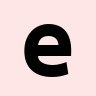

In [ ]:
# Take a look at images

# 1st image
ims[0]

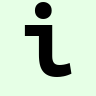

In [ ]:
# 2nd image
ims[1]

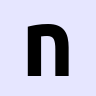

In [ ]:
ims[2]

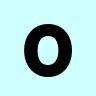

In [ ]:
ims[3]

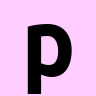

In [ ]:
ims[4]

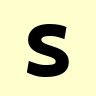

In [ ]:
ims[5]

In [ ]:
# The game is on. Let's play some einops code
from einops import rearrange, reduce, repeat

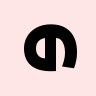

In [ ]:
# transpose the first 2 dims
rearrange(ims[0], 'h w c -> w h c')

In [ ]:
# transpose the last 2 dims
rearrange(ims[0], 'h w c -> h c w')
# This is very interesting. In theory this type of transformation should be allowed. But in reality it does not work probably bc the data handling tools in this context (whatever they are) don't allow such image dims.

TypeError: ignored

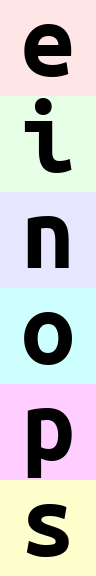

In [ ]:
# composition of new axes  # bxh is the new hight of a single image.
rearrange(ims, 'b h w c -> (b h) w c')

In [ ]:
rearrange(ims, 'b h w c ->  (b h w c)')
# This is no visual for this thing.

array([1.        , 0.90196078, 0.90196078, ..., 1.        , 1.        ,
       0.80392157])
<array of shape (165888,)>


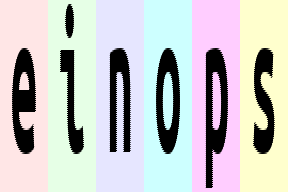

In [ ]:
# Width to height transformation
rearrange(ims, 'b h (w1 w2) c -> (h w2) (b w1) c', w2=2)


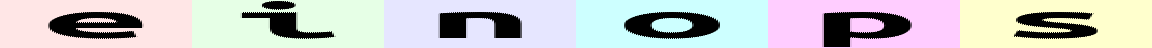

In [ ]:
# Height to width transformation
rearrange(ims, 'b (h1 h2) w c ->  h1 (b w h2) c', h2=2)

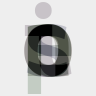

In [ ]:
# Reduce
from einops import reduce
# average over the batch
reduce(ims, 'b h w c -> h w c', "mean")

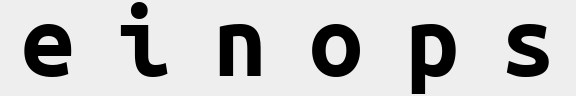

In [ ]:
# average over channels
reduce(ims, 'b h w c -> h (b w)', "mean")

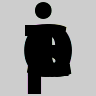

In [ ]:
# min over the batch
reduce(ims, 'b h w c -> h w c', "min")

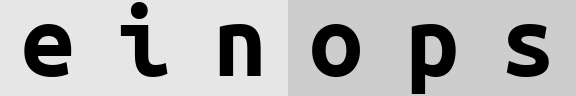

In [ ]:
# min over channnels
reduce(ims, 'b h w c -> h (b w)', "min")

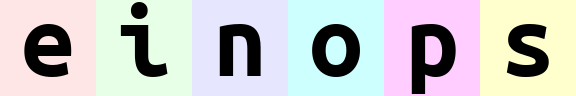

In [ ]:
# letters arranged horizontally
rearrange(ims, 'b h w c -> h (b w) c')

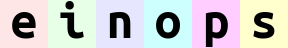

In [ ]:
# mean_pooling over a 2x2 patch
reduce(ims, 'b (h h1) (w w1) c -> h (b w) c', "mean", h1=2,w1=2)

# seems to be a good way to reduce some computational cost without much loss of info.

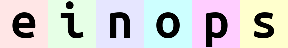

In [ ]:
# max_pooling over a 2x2 patch
reduce(ims, 'b (h h1) (w w1) c -> h (b w) c', "max", h1=2,w1=2)

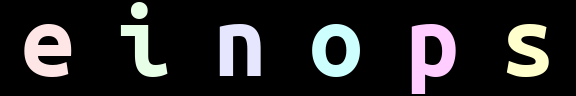

In [ ]:
# compute max in each image individually, then show a difference
x = reduce(ims, 'b h w c -> b () () c', 'max') - ims
rearrange(x, 'b h w c -> h (b w) c')

In [ ]:
# Other fun part I didn't explore https://github.com/arogozhnikov/einops/blob/master/docs/1-einops-basics.ipynb


In [ ]:
# Write DL codes with einops
# Aug 4th To follow up https://github.com/arogozhnikov/einops/blob/master/docs/2-einops-for-deep-learning.ipynb
# Final part: http://einops.rocks/pytorch-examples.html
# other notes:
# https://www.blopig.com/blog/2022/05/einops-powerful-library-for-tensor-operations-in-deep-learning/
# https://openreview.net/pdf?id=oapKSVM2bcj